In [2]:
# Importing necessary libraries for data analysis and visualization

# Importing pandas library for data manipulation and analysis
import pandas as pd
# Importing numpy library for scientific computing
import numpy as np
# Importing seaborn library for creating informative and attractive statistical graphics
import seaborn as sns
# Importing matplotlib.pyplot library for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import optuna
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import mlflow

# Importing the accuracy_score function from the scikit-learn library
from sklearn.metrics import accuracy_score

# Import the confusion_matrix function from sklearn.metrics module
from sklearn.metrics import confusion_matrix


In [4]:
# Reading the data file using pandas library and storing its contents in a DataFrame object

df=pd.read_csv("../dataset/framingham_heart_disease.csv")

In [5]:
# Displaying the column names of the DataFrame

df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
# Counting the number of missing values in each column of the DataFrame

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# Displaying the first few rows of the DataFrame

df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [8]:
#since education has vey less influence in this prediction and it having a large number of null values, drop the attribute

data = df.drop(['education'], axis = 1)
data.head()

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

### Finding mean of attributes and replacing null values with mean values

In [9]:
# Calculating the mean values of certain columns of the DataFrame

mean_cigsPerDay = round(data["cigsPerDay"].mean())
mean_BPmeds = round(data["BPMeds"].mean())
mean_totChol = round(data["totChol"].mean())
mean_BMI = round(data["BMI"].mean())
mean_glucose = round(data["glucose"].mean())
mean_heartRate = round(data["heartRate"].mean())

In [10]:
# Replace missing values with Mean values

data['cigsPerDay'].fillna(mean_cigsPerDay, inplace = True)
data['BPMeds'].fillna(mean_BPmeds, inplace = True)
data['totChol'].fillna(mean_totChol, inplace = True)
data['BMI'].fillna(mean_BMI, inplace = True)
data['glucose'].fillna(mean_glucose, inplace = True)
data['heartRate'].fillna(mean_heartRate, inplace = True)

/tmp/ipykernel_16468/2824471032.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cigsPerDay'].fillna(mean_cigsPerDay, inplace = True)
/tmp/ipykernel_16468/2824471032.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [11]:
# Ensure that all missing values are filled

data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Analysis through visualizing data

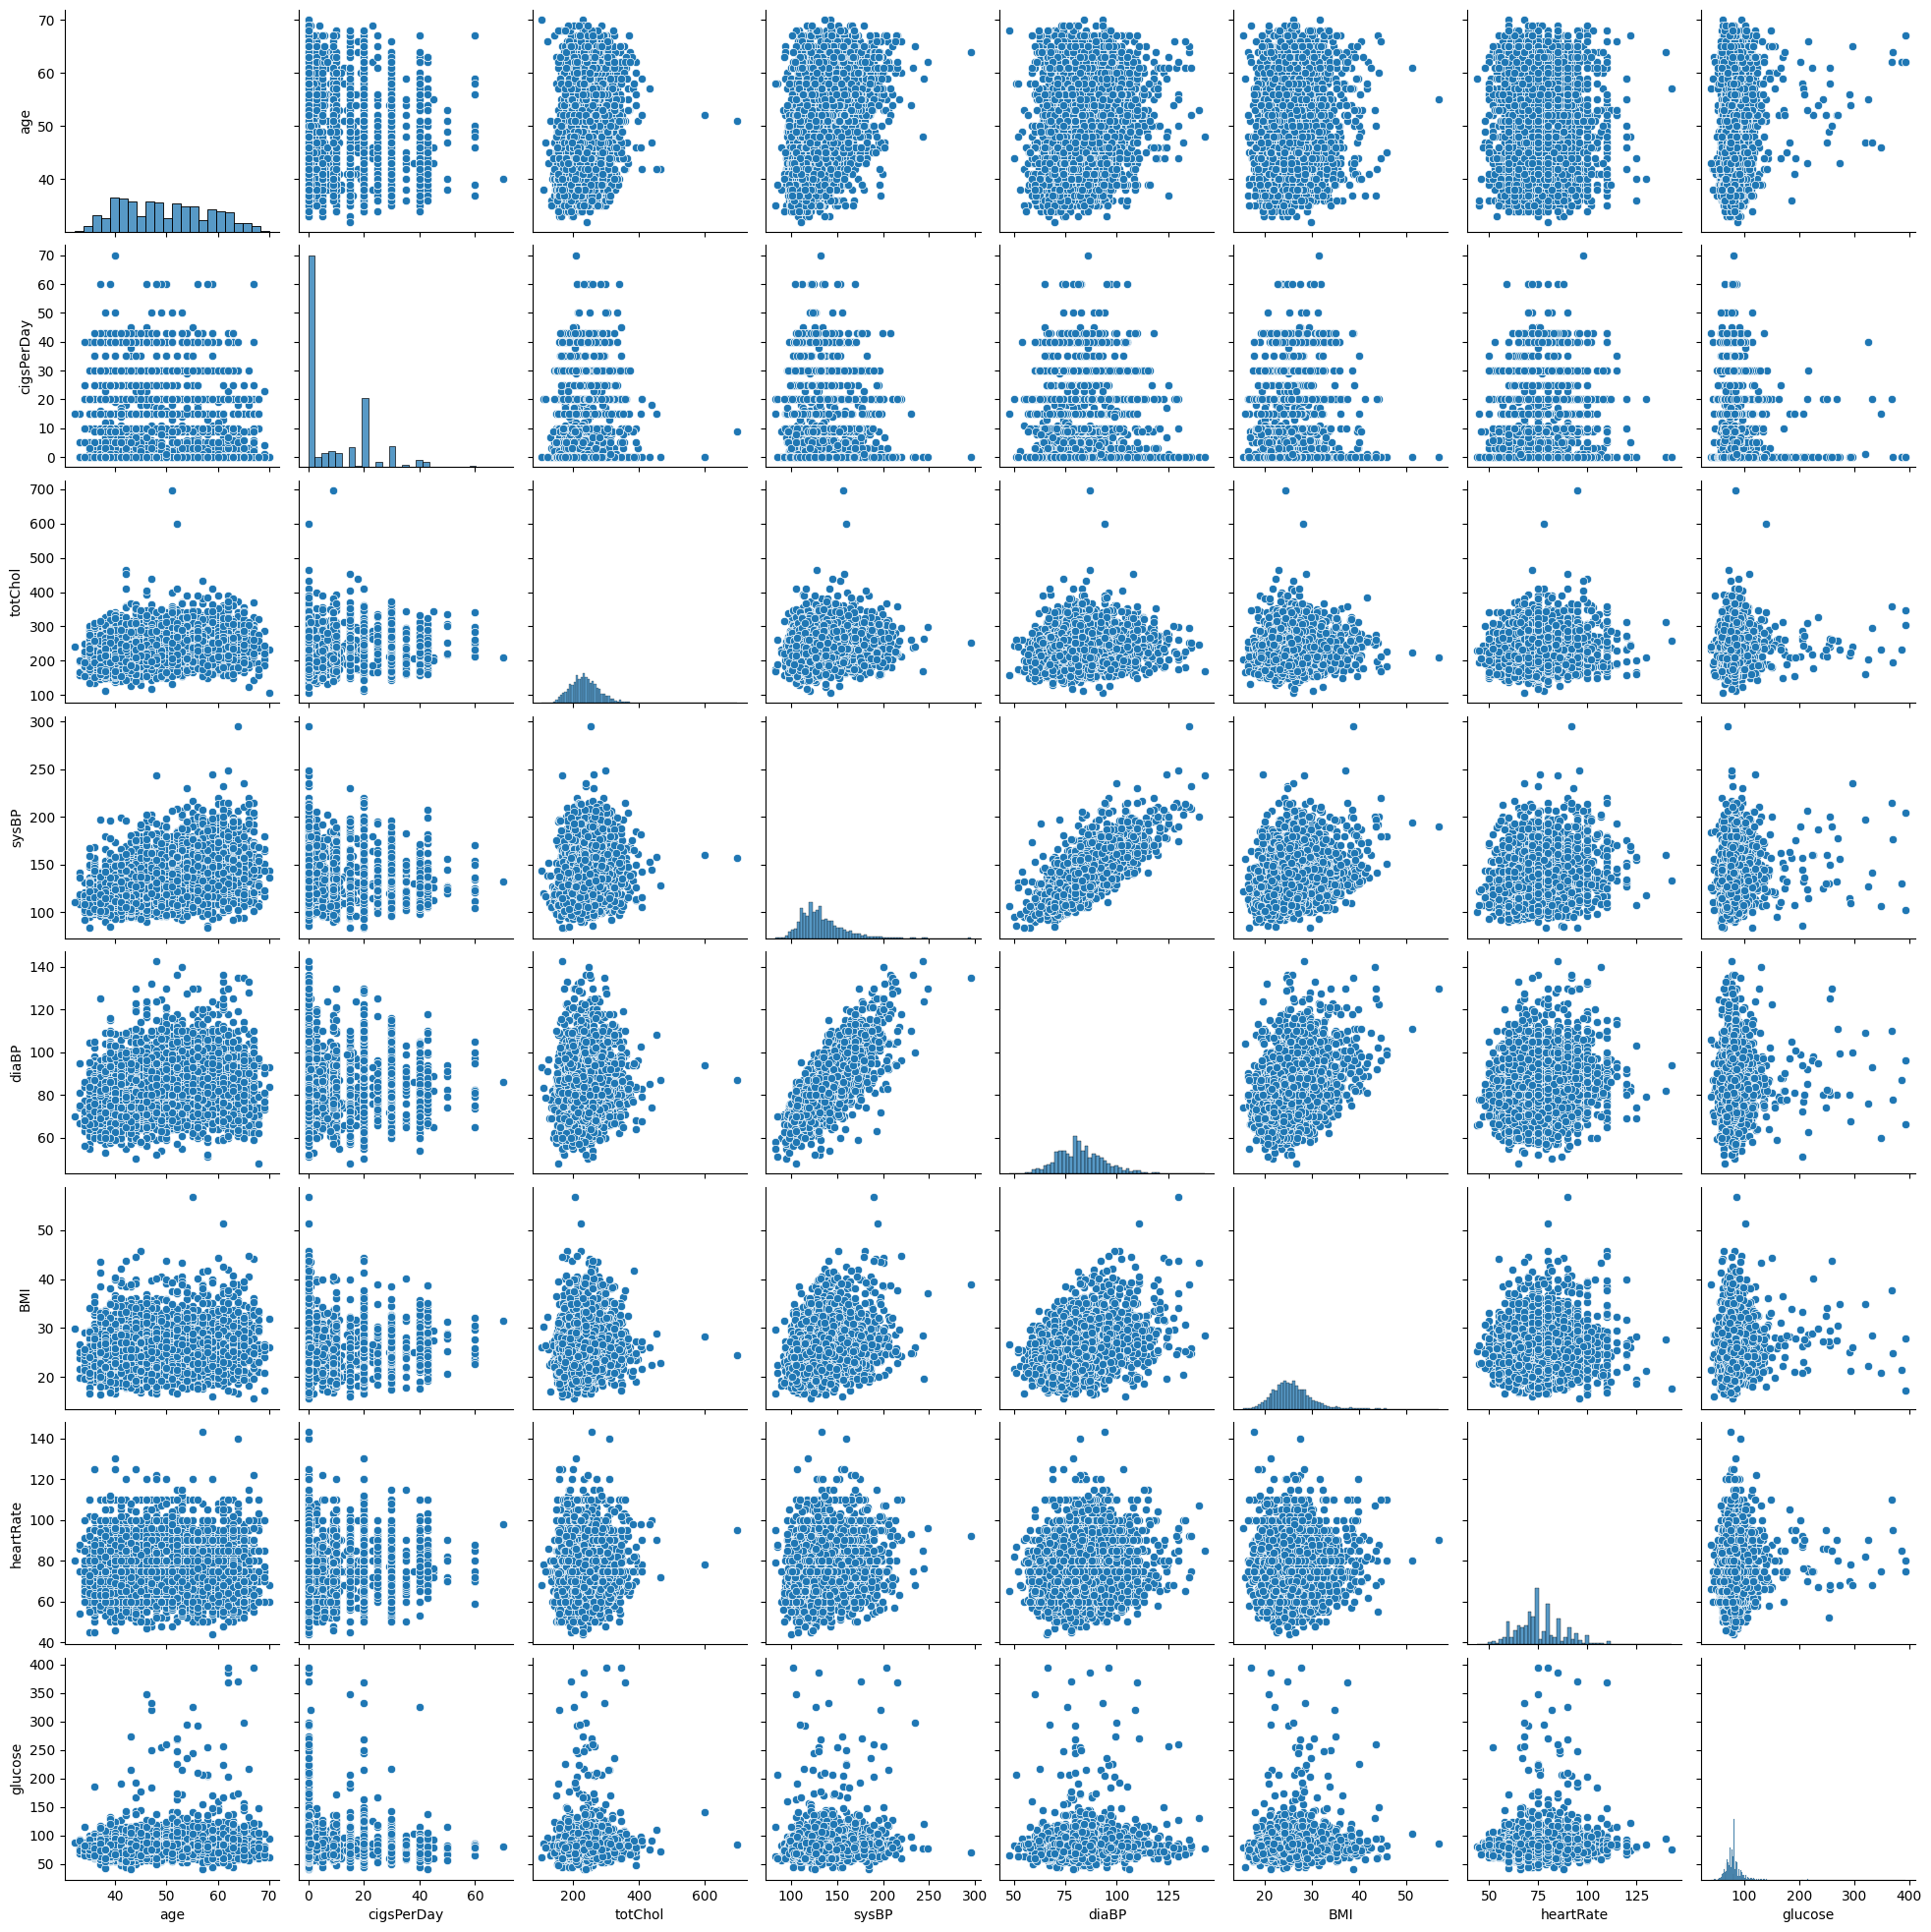

In [12]:
# Creating a pairwise scatter plot of selected columns in the DataFrame

sns.pairplot(data[["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]);

In [13]:
# Splitting the DataFrame into predictor variables and target variable

X = data.drop('TenYearCHD',axis=1)

# Load the target variable to y

y=data['TenYearCHD']

In [14]:
# Train/Test splitting of data 


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

### Feature Selection

In [15]:
# Get column names
feature_names=X.columns

# Initializing Logistic Regression Model

Classifier = LogisticRegression()

# 1. Forward Feature Selection (FFS)
ffs = SFS(Classifier, 
          k_features=7,  # specify desired number of features or 'best' for optimal
          forward=True, 
          floating=False, 
          scoring='accuracy', 
          cv=5)
ffs = ffs.fit(X_train, y_train)

# Results
print("Forward Feature Selection - Selected Features:")
print([feature_names[i] for i in ffs.k_feature_idx_])

/home/jayakrishnan/Documents/Projects/Heart-Disease-Prediction-App/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jayakrishnan/Documents/Projects/Heart-Disease-Prediction-App/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

Forward Feature Selection - Selected Features:
['age', 'cigsPerDay', 'prevalentStroke', 'sysBP', 'diaBP', 'heartRate', 'glucose']


/home/jayakrishnan/Documents/Projects/Heart-Disease-Prediction-App/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jayakrishnan/Documents/Projects/Heart-Disease-Prediction-App/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

In [16]:
# Results
print("Forward Feature Selection - Selected Features:")
print([feature_names[i] for i in ffs.k_feature_idx_])

Forward Feature Selection - Selected Features:
['age', 'cigsPerDay', 'prevalentStroke', 'sysBP', 'diaBP', 'heartRate', 'glucose']


In [17]:
ffs_df = pd.DataFrame.from_dict(ffs.get_metric_dict()).T
ffs_df[["feature_idx", "avg_score"]]

feature_idx avg_score
1                     (13,)  0.840861
2                  (10, 13)  0.841536
3              (10, 12, 13)  0.841536
4           (5, 10, 12, 13)  0.841536
5        (1, 5, 10, 12, 13)  0.841873
6     (1, 3, 5, 10, 12, 13)  0.844234
7  (1, 3, 5, 9, 10, 12, 13)  0.846595

In [18]:
# Columns to select
columns_to_select = [feature_names[i] for i in ffs.k_feature_idx_]

# Select the specified columns and create a new DataFrame
X_train = X_train[columns_to_select]
X_test = X_test[columns_to_select]

In [19]:
X_train.head()

age  cigsPerDay  prevalentStroke  sysBP  diaBP  heartRate  glucose
3491   54         3.0                0  121.0   79.0       75.0     68.0
3144   67         0.0                0  170.0   89.0       66.0     63.0
1010   42        30.0                0  111.5   70.0       90.0     80.0
1017   59         0.0                0  127.0   83.0       57.0     86.0
839    55         0.0                0  133.0   80.0       75.0     70.0

In [20]:
## Standardze the dataset

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()


X_train = scalar.fit_transform(X_train)
X_test =scalar.fit_transform(X_test)

In [22]:
import pickle
import os


# Check if the folder 'app/trained_model' exists, and create it if it doesn't
if not os.path.exists('../app/trained_model'):
    os.makedirs('../app/trained_model')

with open('../app/trained_model/scaling.pkl', 'wb') as file:
    pickle.dump(scalar, file)

## Hyperparameter tuning with optuna

In [ ]:
# Define the objective function for Optuna optimization
def objective(trial):
    # Hyperparameters to tune
    penalty = trial.suggest_categorical('penalty', ['l2'])
    C = trial.suggest_loguniform('C', 1e-5, 100)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga', 'lbfgs'])
    
    # If 'l1' is selected, use 'liblinear' or 'saga' solvers only
    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        solver = 'liblinear'
    
    # Initialize Logistic Regression with the hyperparameters
    model = LogisticRegression(penalty=penalty, C=C, solver=solver, max_iter=1000)
    
    # Perform cross-validation to evaluate the model
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    return score

# Create an Optuna study to optimize the objective function
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=50)



[I 2024-12-04 11:38:35,543] A new study created in memory with name: no-name-c6c87d57-d992-461f-bacd-b02b4f7dcdc4
/tmp/ipykernel_16468/1922779669.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 100)
[I 2024-12-04 11:38:35,594] Trial 0 finished with value: 0.8449094656514555 and parameters: {'penalty': 'l2', 'C': 0.045109911008009894, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8449094656514555.
/tmp/ipykernel_16468/1922779669.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 100)
[I 2024-12-04 11:38:35,628] Trial 1 finished with value: 0.8388403427189262 and parameters: {'pen

In [28]:
# Print the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters: ", best_params)
print("Best Score: ", study.best_value)


Best Hyperparameters:  {'penalty': 'l2', 'C': 0.23296940020545015, 'solver': 'lbfgs'}
Best Score:  0.8462579703726416


In [29]:
best_params['penalty']

'l2'

In [31]:
# Train the Logistic Regression Model
Classifier = LogisticRegression(penalty=best_params['penalty'], C=best_params['C'], solver=best_params['solver'], max_iter=1000)

Classifier.fit(X_train,y_train)


LogisticRegression(C=0.23296940020545015, max_iter=1000)

In [32]:
def eval_metrics(actual, pred):
    accuracy = accuracy_score(actual, pred)
    precision = precision_score(actual, pred, average='weighted')
    recall = recall_score(actual, pred, average='weighted')
    f1 = f1_score(actual, pred, average='weighted')
    return accuracy, precision, recall, f1

mlflow.set_tracking_uri("http://127.0.0.1:5000")
# mlflow.set_tracking_uri(None)

# Set experiment name
mlflow.set_experiment(experiment_name='Heart Disease Prediction')

# Start an MLflow run
with mlflow.start_run():

    # Train the Logistic Regression Model
    Classifier = LogisticRegression(penalty=best_params['penalty'], C=best_params['C'], solver=best_params['solver'], max_iter=1000)
    # Train the model
    Classifier.fit(X_train, y_train)

    # Make predictions
    y_test_hat = Classifier.predict(X_test)

    # # Calculate metrics
    # mse = mean_squared_error(y_test, y_test_hat)
    # accuracy = accuracy_score(y_test, y_test_hat)
    (accuracy, precision, recall, f1) = eval_metrics(y_test, y_test_hat)

    print(f"Classifier model")
    print("  Accuracy: %s" % accuracy)
    print("  Precision: %s" % precision)
    print("  Recall: %s" % recall)
    print("  F1 Score: %s" % f1)
    

    
    # Log parameters and metrics
    mlflow.log_param('model_type', 'Linear Regression')
    mlflow.log_params(best_params)
    mlflow.log_metrics({
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
        })
    
    # Log model
    mlflow.sklearn.log_model(Classifier, 'model')

2024/12/04 11:39:30 INFO mlflow.tracking.fluent: Experiment with name 'Heart Disease Prediction' does not exist. Creating a new experiment.


Classifier model
  Accuracy: 0.8702830188679245
  Precision: 0.8301242204798605
  Recall: 0.8702830188679245
  F1 Score: 0.8239816976093597


2024/12/04 11:39:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/04 11:39:32 INFO mlflow.tracking._tracking_service.client: üèÉ View run bald-kite-934 at: http://127.0.0.1:5000/#/experiments/1/runs/f0d48794cb214d658daa766df66a96e8.
2024/12/04 11:39:32 INFO mlflow.tracking._tracking_service.client: üß™ View experiment at: http://127.0.0.1:5000/#/experiments/1.


### Pickling Trained Model

In [33]:
import pickle
    
with open('../app/trained_model/reg_model.pkl', 'wb') as file:
    pickle.dump(Classifier, file)

### Confusion matrix

In [35]:

# Predicting the target variable using the trained model and the test data
y_test_hat = Classifier.predict(X_test)

# Creating a DataFrame to store the actual and predicted values of the target variable
Results = pd.DataFrame({'Actual': y_test, 'Predictions': y_test_hat})

# Displaying the first 5 rows of the Results DataFrame
Results.head(5)

Actual  Predictions
906        0            0
857        0            0
2761       0            0
108        1            0
2894       0            0

In [36]:


# Calculating the accuracy score of the predicted values
print(accuracy_score(y_test,y_test_hat))

0.8702830188679245


In [37]:
# Predicting the target variable for the training data
y_train_hat = Classifier.predict(X_train)

In [38]:
# Calculating the accuracy score of the predicted values for the training data
print(accuracy_score(y_train, y_train_hat))

0.8476062036412677


In [39]:
y_test_hat_proba = Classifier.predict_proba(X_test)
y_test_hat_proba

array([[0.88339348, 0.11660652],
       [0.93743199, 0.06256801],
       [0.95409926, 0.04590074],
       ...,
       [0.70678763, 0.29321237],
       [0.65400795, 0.34599205],
       [0.92038738, 0.07961262]])

In [40]:

# Calculate the confusion matrix for the test set and output it to the console.
cm = confusion_matrix(y_test,y_test_hat)
print(cm)

[[1096   10]
 [ 155   11]]


Text(95.72222222222221, 0.5, 'True Label')

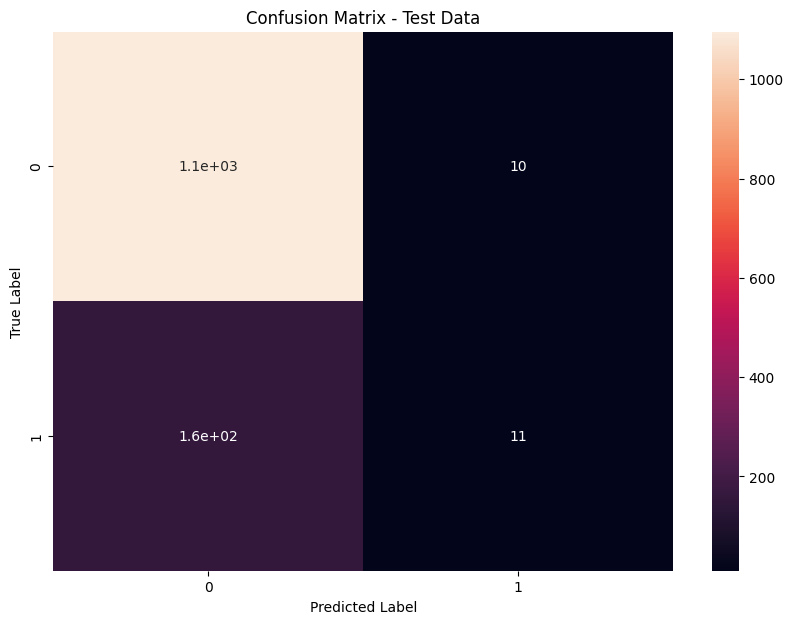

In [41]:
# Importing the seaborn library for visualization
import seaborn as sn

# Creating a heatmap using the confusion matrix with annotations
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)

# Setting the title, x-label and y-label of the heatmap
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


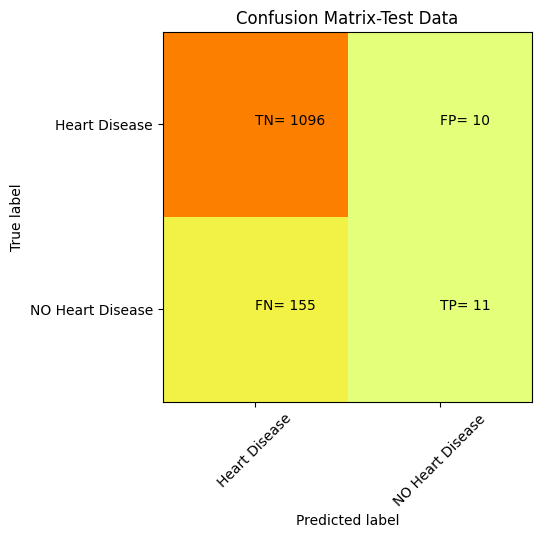

In [42]:
# Displaying an image of the confusion matrix with the Wistia color map
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)

# Creating a list of class names and setting the title, x-label and y-label of the plot
classNames = ['Heart Disease', 'NO Heart Disease']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Setting the ticks and labels for the x and y axes
tick_marks = np.arange(2)
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# Adding the values of True Negatives, False Positives, False Negatives and True Positives to the plot
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+"= "+str(cm[i][j]))

# Displaying the plot
plt.show()


In [43]:
# Import the classification_report function from sklearn.metrics module
from sklearn.metrics import classification_report

# Call the classification_report function with y_test and y_test_hat as arguments and print the report, which includes metrics such as precision, recall, F1-score, and support for each class in the classification model


print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1106
           1       0.52      0.07      0.12       166

    accuracy                           0.87      1272
   macro avg       0.70      0.53      0.52      1272
weighted avg       0.83      0.87      0.82      1272



In [44]:
# Calculate metrics values individually
# Assigning Variables for convinience

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [45]:
# Calculating precision, recall, specificity, and accuracy mathematically by using their equations 

In [46]:
recall = TP / (TP + FN )
print("Recall= ",recall)

Recall=  0.06626506024096386


In [47]:
precision = TP / (TP + FP)
print("Precision=",precision)

Precision= 0.5238095238095238


In [48]:
specificity = TN /  (TN + FP)
print("Specificity = ", specificity)

Specificity =  0.9909584086799277


In [49]:
accuracy = ( TP + TN ) / ( TP + TN + FP + FN)
print("Accuracy =" , accuracy)

Accuracy = 0.8702830188679245
